# Iris Dataset

Again one of the most common dataset that a beginner solves when he/she dives into Machine Learning. So, lets go and solve this.

Lets start by importing the necessary packages.

In [49]:
#Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score , confusion_matrix
from sklearn.linear_model import LogisticRegression
import pickle
import joblib 

If you are a very beginner you might think how did I load so many things. Well don't worry, as you go ahead you will get to learn more and more.

## Step : Importing the dataset

Its time to import the dataset. I have downloaded it from Kaggle.com and saved it as IRIS.csv

In [2]:
iris_df = pd.read_csv('IRIS.csv') #loading the dataset

iris_df.head(7) #showing the first 7 rows

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa


In [3]:
iris_df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

We can see that there are 4 features namely sepal_length , sepal_width , petal_length , petal_width and the target variable is the species of the flower.

## Step 2: Analysing the data

Lets check the data. 
First lets see the dimension.

In [4]:
iris_df.shape

(150, 5)

Here, we can see that the dataset has 150 examples. We can see why this is such a beginner project because of the small size of the dataset.

Lets see the summary of the dataset.

In [5]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


We can see that the count for all the features are 150 indicating there are no missing values. We will again see that to reconfirm it.

More over the data also looks quite finely distributed, but we are going to reassure ourselves through a box plot in later stages.

Lets check basic information about the dataset.

In [6]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Only the species variable species has dtype object. We need to convert it to numerical values since, most of Machine Learning models are quite delicate to object values.

First lets see the missing values.

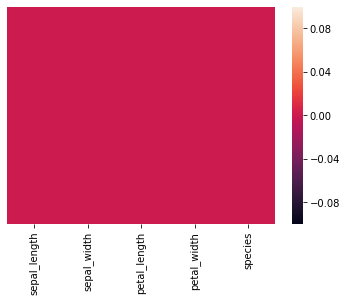

In [7]:
sns.heatmap(iris_df.isnull() , yticklabels = False) #generating heatmap for missing values

plt.show()

In [8]:
iris_df.isnull().sum() #numerically checking the null values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Now we are done with Missing values lets move on to check the distribution of all the features.

One way to check it is using the boxplots.

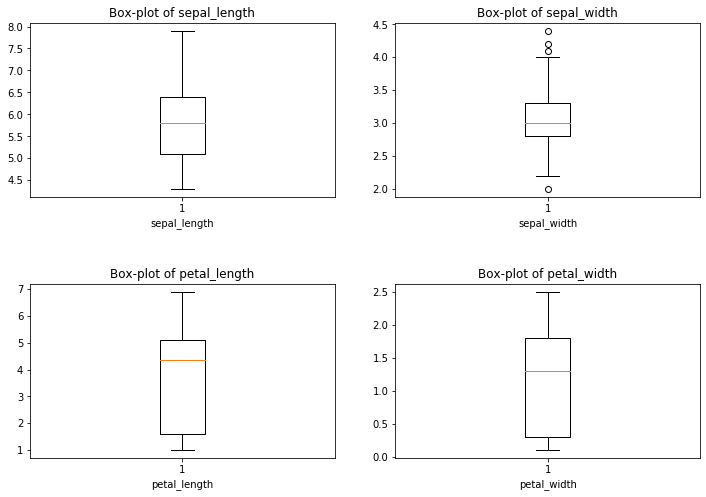

In [9]:
i = 1
plt.figure(figsize = (12 , 8)) #setting the figure size
plt.subplots_adjust(hspace = 0.5) #adjusting the subplots to provide space between them

for column in iris_df.drop('species' , axis = 1).columns:
    
    plt.subplot(2 , 2 , i)
    
    plt.boxplot(iris_df[str(column)]) #generating boxplots of each features
    plt.xlabel(str(column))
    plt.title('Box-plot of '+str(column))
    
    i = i + 1

Okay so sepal_width has outliers. We need to see to it.

## Step 3 : Feature modification

In [10]:
y = np.array(iris_df['species'])  # extracting the targets 
X = np.array(iris_df.drop('species' , axis = 1)) # extracting the features

Now lets split the data into train, cv and test set.

In [11]:
#Splitting the train and cv and test set

X_train , X_1 , y_train ,y_1 = train_test_split(X , y , test_size = 0.8 , random_state = 0) 

X_cv , X_test , y_cv , y_test = train_test_split(X_1 , y_1 , test_size = 0.5 , random_state = 0)

## Step 4 : Defining the model

I love to use Grid-Search CV to get the best hyperparameters. So lets do that.!

In [15]:
#defining the parameters

params = {'multi_class': ['multinomial'],
          'solver' : ['newton-cg', 'lbfgs'],
          'penalty' : ['l2'],
          'C':[0.1 , 0.3 , 1 , 3]
         }

#initializing the GridSearchCV object

grid = GridSearchCV(LogisticRegression(),
                   params,
                   cv = 5,
                   n_jobs = -1)

grid.fit(X_train , y_train) #fitting the grid

grid.best_estimator_ #finding the best estimator

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
lr = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

lr.fit(X_train , y_train)
y_pred = lr.predict(X_train)

print('The f1 score is', f1_score(y_train , y_pred , average = 'weighted')) #finding the f1 score

The f1 score is 0.9333333333333333


In [39]:
#Generating the confusion matrix
conf_matrix = confusion_matrix(y_train , y_pred , labels = ['Iris-versicolor' , 'Iris-virginica' , 'Iris-setosa'])
conf_matrix

array([[10,  1,  0],
       [ 1,  8,  0],
       [ 0,  0, 10]], dtype=int64)

As we can see the error is very small.

Still lets look at the errors of the confusion matrix

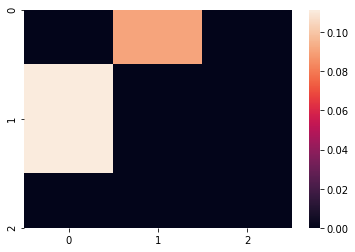

In [40]:
row_sum = np.sum(conf_matrix , axis = 1 , keepdims = True) #summing the rows

np.fill_diagonal(conf_matrix , 0) #filling diagonal with 0 to remove the correct values

conf_matrix = conf_matrix / row_sum

sns.heatmap(conf_matrix) #generating a heatmap
plt.show()

The confusion matrix shows 'Iris-virginica' is misclassified as 'Iris-versicolor' a lot of the times. Moreover the vice versa also occurs for a quite number of times too.

Lets check the error in the cross validation set to see if we are on the right track.

In [43]:
y_cv_pred = lr.predict(X_cv) #predicting the y values for cross validation

print('F1 score of CV set is' , f1_score(y_cv , y_cv_pred , average = 'weighted'))
print('F1 score of Train set is' , f1_score(y_train , y_pred , average = 'weighted'))

F1 score of CV set is 0.949327731092437
F1 score of Train set is 0.9333333333333333


Yay. We have done better in the cross validation set than the training set.

We are okay to go.

I want to keep this problem simplem hence I won't use any other classification technique!

Its time to check for the test set before we deploy our model.

In [45]:
y_test_pred = lr.predict(X_test)

print('F1 score of test set is' , f1_score(y_test , y_test_pred , average = 'weighted'))

F1 score of test set is 0.8142490842490843


Interesting. The test data got a 81% f1 score. For this example we can say its okay. In further models we will check more.

Its time we save the model using the joblib package.

In [50]:
joblib.dump(lr, 'iris_model.pkl')  #saving the model

['iris_model.pkl']